In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("datasets_11657_16098_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Basic info
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


np.int64(0)

In [3]:
# Drop 'Cabin' due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

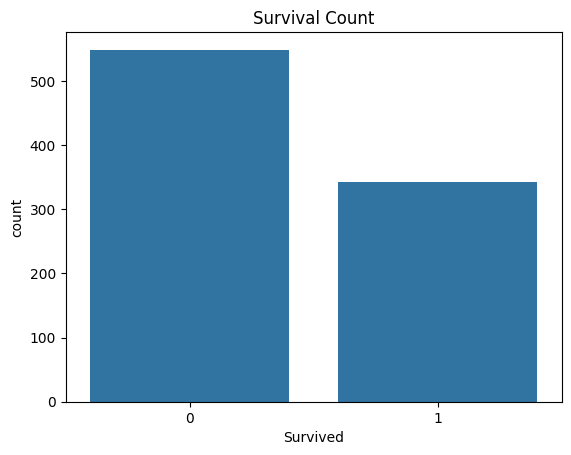

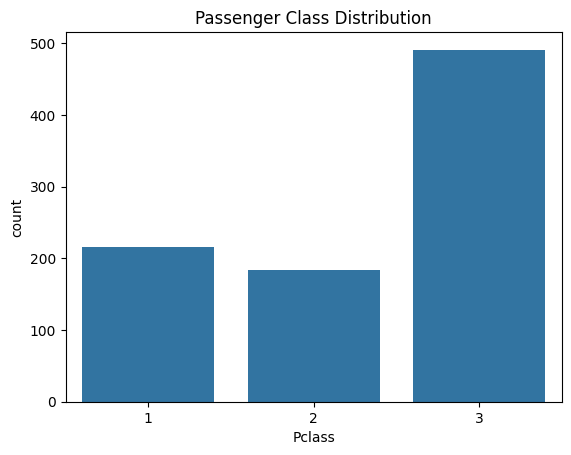

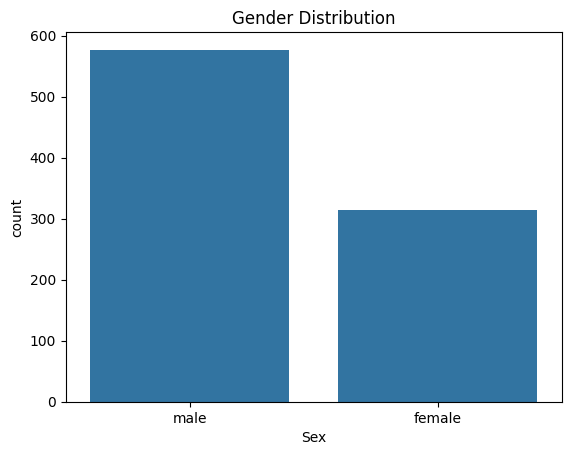

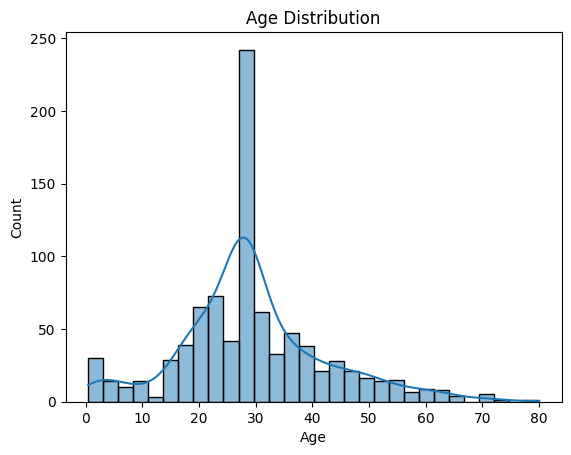

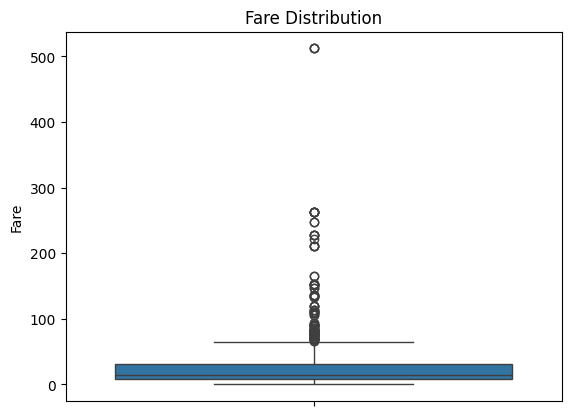

In [4]:
# Categorical plots
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

# Numerical plots
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(y='Fare', data=df)
plt.title("Fare Distribution")
plt.show()

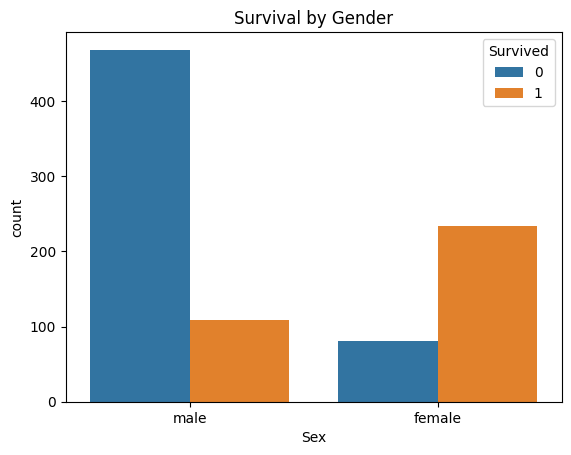

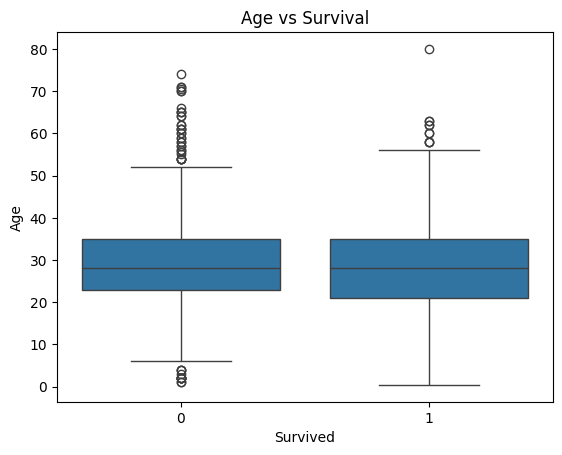

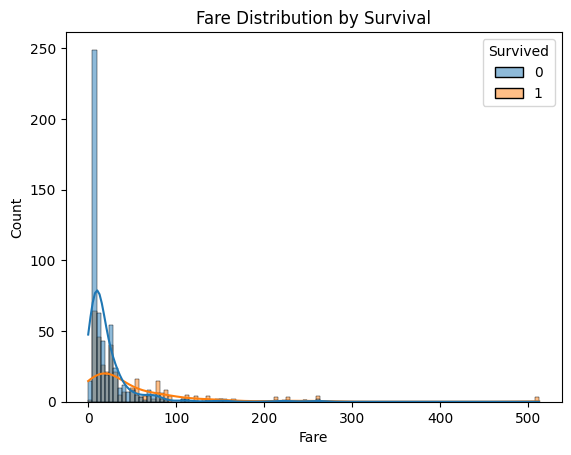

In [5]:
# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

# Fare vs Survival
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title("Fare Distribution by Survival")
plt.show()

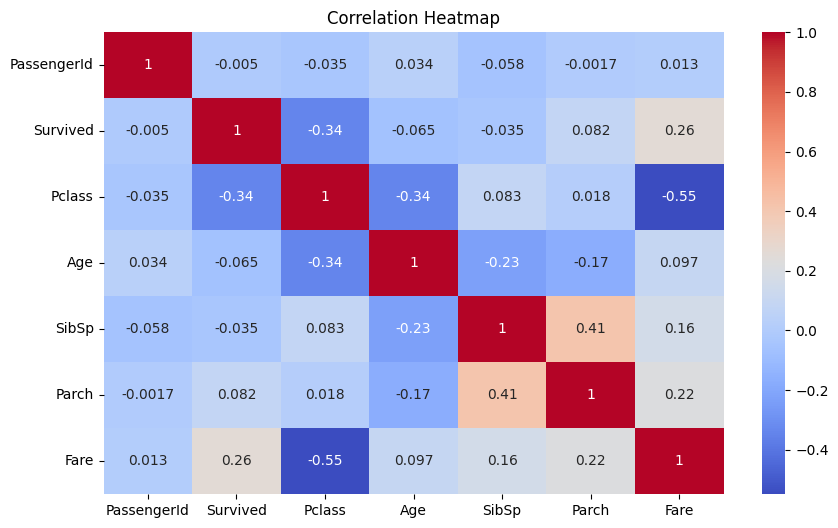

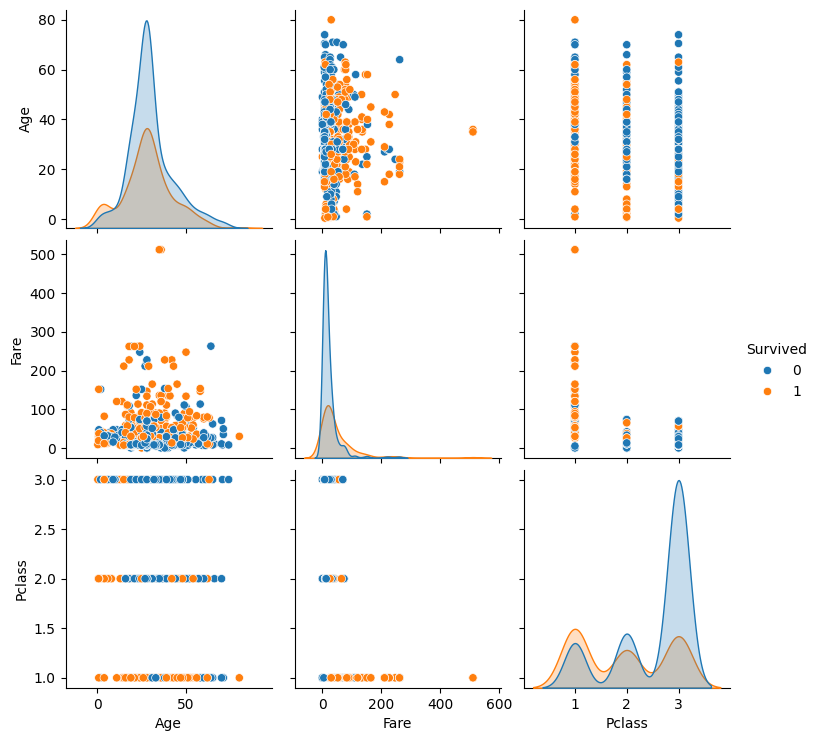

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()


### Summary of Insights:
- Females had higher survival rate than males.
- Passengers in 1st class were more likely to survive.
- Younger passengers had a slightly better survival rate.
- Higher fare passengers had better survival chances.
